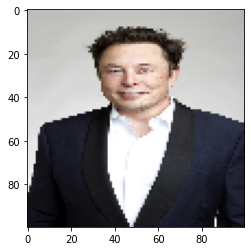

In [2]:
from keras.preprocessing import image
import numpy as np
img_rows, img_cols = 100, 100
img = image.load_img('/content/drive/MyDrive/Dataset/Elon_Musk.jpg', target_size=(img_rows, img_cols))
import matplotlib.pyplot as plt
plt.imshow(img)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# Create a data generator
from keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 3)
num_classes=10
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/training-originals/',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_train=train_generator.n/train_generator.batch_size

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test1/',target_size=(img_rows,img_cols),batch_size=10,class_mode='categorical', shuffle=True)
step_size_val=val_generator.n/val_generator.batch_size

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Found 39 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               18874496  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 18,895,178
Trainable param

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
history = model.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=20,validation_data=val_generator,validation_steps=step_size_val)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
3/3 [==============================] - 39s 11s/step - loss: 2.2939 - accuracy: 0.0377 - val_loss: 2.2970 - val_accuracy: 0.1000
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 2.2810 - accuracy: 0.0741 - val_loss: 2.2912 - val_accuracy: 0.1500
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 2.2686 - accuracy: 0.2271 - val_loss: 2.2868 - val_accuracy: 0.1500
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 2.2655 - accuracy: 0.2100 - val_loss: 2.2833 - val_accuracy: 0.1500
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 2.2409 - accuracy: 0.2154 - val_loss: 2.2811 - val_accuracy: 0.1000
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 2.2320 - accuracy: 0.2377 - val_loss: 2.2792 - val_accuracy: 0.1000
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 2.1962 - accuracy: 0.2100 - val_loss: 2.2776 - val_accuracy: 0.1000
Epoch 8/20
3/3 [=======================

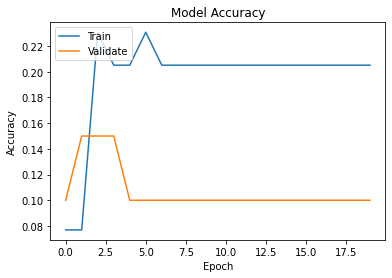

In [7]:
import matplotlib
import matplotlib.pyplot as plt
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

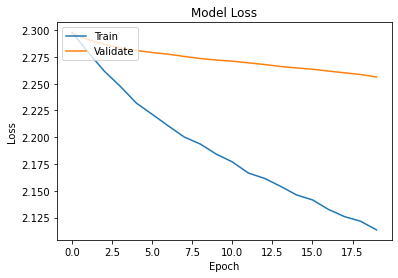

In [8]:
# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()